# Topics in Artificial Intelligence (CPSC 532S)
# Assignment 1: Intriduction to Deep Learning


This assignment is inspired and adopted from the Deep Learning Lab from Vicente Ordonez's course on Language and Vision at the University of Virginia. The first two parts of this notebook are taken nearly verbatim from his lab. Section 1 is provided for you and implements a single-layer supervised neural network; no coding is required for Section 1. Section 2 and Section 3 are the ones where you need to code the solutions and provide answers to questions. Section 4 is designed to introduce you to PyTorch and, more importantly, introduce you to key debugging strategies when dealing with training of neural networks. 

# 1. Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="http://www.cs.ubc.ca/~lsigal/532S_2022W1/Assignment1/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## 1.1. Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [1]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.49903442 0.5022388  0.49721815]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.49830395 0.49933899 0.49958486]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.49938328 0.50086532 0.500723  ]
 [0.49817391 0.49998381 0.49985208]]


## 1.2. Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [2]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## 1.3. Backward-propagation (Backpropagation)

As we discussed in class, backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [3]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.00229247 -0.01606694  0.00323191]
 [-0.00498669 -0.0069984   0.01161546]
 [ 0.00344952 -0.00060499  0.01240824]
 [ 0.00559821 -0.00679689  0.00109449]]
B = [[ 0.01150163 -0.00736315 -0.00068166]]

x1    = [[1 2 2 3]]
lin   = [[ 0.0275144  -0.05902755  0.05388111]]
y_hat = [[0.50687817 0.4852474  0.51346702]]

loss = 0.1907426002558412

dy_hat = [[0.51375633 0.47049479 0.52693404]]
dlin   = [[0.12841478 0.1175213  0.13163794]]
dx1    = [[-1.16837811e-03  6.62095857e-05  2.00526501e-03  6.41901200e-05]]

dW = [[0.12841478 0.1175213  0.13163794]
 [0.25682956 0.2350426  0.26327589]
 [0.25682956 0.2350426  0.26327589]
 [0.38524433 0.3525639  0.39491383]]
dB = [[0.12841478 0.1175213  0.13163794]]


## 1.4. Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [4]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -3.0989331   -4.19522494  -5.62755591]
 [ -5.03245546  -6.81275844  -9.13876601]
 [-45.60993846 -61.74510546 -82.82607929]
 [ -7.05868095  -9.55579013 -12.81832179]]

approxGradWeight: [[ -3.0988725   -4.19531765  -5.62753918]
 [ -5.03229564  -6.81300292  -9.13872184]
 [-45.59677264 -61.76513757 -82.8223778 ]
 [ -7.05836647  -9.55627104 -12.81823481]]


## 1.5. Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [5]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [6]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.52614562
epoch[10] = 1.45949517
epoch[20] = 1.44209756
epoch[30] = 1.43580690
epoch[40] = 1.43266491
epoch[50] = 1.43062450
epoch[60] = 1.42839239
epoch[70] = 1.42670599
epoch[80] = 1.42589973
epoch[90] = 1.42529593
epoch[100] = 1.42481246
epoch[110] = 1.42441450
epoch[120] = 1.42408137
epoch[130] = 1.42379895
epoch[140] = 1.42355687
epoch[150] = 1.42334726
epoch[160] = 1.42316409
epoch[170] = 1.42300264
epoch[180] = 1.42285924
epoch[190] = 1.42273105
epoch[200] = 1.42261583
epoch[210] = 1.42251180
epoch[220] = 1.42241753
epoch[230] = 1.42233181
epoch[240] = 1.42225363
epoch[250] = 1.42218210
epoch[260] = 1.42211647
epoch[270] = 1.42205609
epoch[280] = 1.42200038
epoch[290] = 1.42194885
epoch[300] = 1.42190107
epoch[310] = 1.42185665
epoch[320] = 1.42181527
epoch[330] = 1.42177664
epoch[340] = 1.42174050
epoch[350] = 1.42170663
epoch[360] = 1.42167482
epoch[370] = 1.42164491
epoch[380] = 1.42161672
epoch[390] = 1.42159013


# 2. Two-layer neural network with 1-hidden layer.
Section 1 implemented a single layer neural network that takes as input vectors of size 4, and outputs vectors of size 3. Here your task is to modify the code to train a two layer network with one hidden layer of size hidden_state_size (note that this is a parameter and should be something you can change). You will need to handin your code for this and remaining parts of the notebook; the notebook you hand in should also have code executed and result saved.  

<br>
<center>
<img src="http://www.cs.ubc.ca/~lsigal/532S_2022W1/Assignment1/2_layer_net.png" width="450">
</center>
<br>


## 2.1. Implementing the network and SGD learning [20 points].
Please modify the code of Section 1.5 to implement a two-layer network and the SGD training procedure for it. 


In [7]:
hidden_state_size = 5;

learningRate = 0.1

model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)
model['linear2'] = nn_Linear(hidden_state_size, 3)
model['sigmoid1'] = nn_Sigmoid()
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        loss += model['loss'].forward(a3, yi)

        # Backward.
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid2'].backward(a2,da3)
        da1 = model['linear2'].backward(a1,da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(xi, da0)

        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias


    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.53995505
epoch[10] = 1.51664078
epoch[20] = 1.50111253
epoch[30] = 1.47262691
epoch[40] = 1.44321751
epoch[50] = 1.43327449
epoch[60] = 1.42912930
epoch[70] = 1.42678250
epoch[80] = 1.42526129
epoch[90] = 1.42432761
epoch[100] = 1.42373450
epoch[110] = 1.42331135
epoch[120] = 1.42297847
epoch[130] = 1.42270366
epoch[140] = 1.42247249
epoch[150] = 1.42227650
epoch[160] = 1.42210899
epoch[170] = 1.42196412
epoch[180] = 1.42183699
epoch[190] = 1.42172377
epoch[200] = 1.42162157
epoch[210] = 1.42152824
epoch[220] = 1.42144219
epoch[230] = 1.42136218
epoch[240] = 1.42128728
epoch[250] = 1.42121678
epoch[260] = 1.42115024
epoch[270] = 1.42108752
epoch[280] = 1.42102880
epoch[290] = 1.42097443
epoch[300] = 1.42092467
epoch[310] = 1.42087941
epoch[320] = 1.42083824
epoch[330] = 1.42080065
epoch[340] = 1.42076619
epoch[350] = 1.42073445
epoch[360] = 1.42070511
epoch[370] = 1.42067789
epoch[380] = 1.42065255
epoch[390] = 1.42062888


## 2.2. Gradient checking [10 points].
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section 1.4 above.

In [8]:
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)
model['linear2'] = nn_Linear(hidden_state_size, 3)
model['sigmoid1'] = nn_Sigmoid()
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()


# Forward.
a0 = model['linear1'].forward(xi)
a1 = model['sigmoid1'].forward(a0)
a2 = model['linear2'].forward(a1)
a3 = model['sigmoid2'].forward(a2)
loss += model['loss'].forward(a3, yi)

# Backward.
da3 = model['loss'].backward(a3, yi)
da2 = model['sigmoid2'].backward(a2,da3)
da1 = model['linear2'].backward(a1,da2)
da0 = model['sigmoid1'].backward(a0, da1)
model['linear1'].backward(xi, da0)

gradWeight1 = model['linear1'].gradWeight
gradBias1 = model['linear1'].gradBias

gradWeight2 = model['linear2'].gradWeight
gradBias2 = model['linear2'].gradBias


approxGradWeight1 = np.zeros_like(model['linear1'].weight)
approxGradWeight2 = np.zeros_like(model['linear2'].weight)


# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001

for i in range(0, model['linear1'].weight.shape[0]):
    for j in range(0, model['linear1'].weight.shape[1]):
        # Compute f(w)
        # Forward.
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        fw = model['loss'].forward(a3, yi)


        # Compute f(w + eps)
        shifted_weight = np.copy(model['linear1'].weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon

        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = model['linear1'].bias
        shifted_linear.weight = shifted_weight

        a0 = shifted_linear.forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        fw_epsilon = model['loss'].forward(a3, yi)

        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight1[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight1))
print('\napproxGradWeight: ' + str(approxGradWeight1))


for i in range(0, model['linear2'].weight.shape[0]):
    for j in range(0, model['linear2'].weight.shape[1]):
        # Compute f(w)
        # Forward.
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        fw = model['loss'].forward(a3, yi)

        print(fw)

        # Compute f(w + eps)
        shifted_weight = np.copy(model['linear2'].weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon

        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = model['linear2'].bias
        shifted_linear.weight = shifted_weight

        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid1'].forward(a0)
        a2 = shifted_linear.forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        fw_epsilon = model['loss'].forward(a3, yi)

        print(fw_epsilon)
        print('------------------------')
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight2[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight2))
print('\napproxGradWeight: ' + str(approxGradWeight2))

gradWeight: [[-0.01237767  0.01063036  0.00590516  0.00120277 -0.00167372]
 [-0.00957353  0.00822207  0.00456736  0.00093028 -0.00129454]
 [-0.01841889  0.01581876  0.00878731  0.0017898  -0.00249061]
 [-0.01295865  0.01112933  0.00618234  0.00125922 -0.00175228]]

approxGradWeight: [[-0.01237775  0.01063026  0.00590507  0.00120277 -0.00167373]
 [-0.00957358  0.00822202  0.00456731  0.00093028 -0.00129454]
 [-0.01841906  0.01581855  0.00878712  0.00178981 -0.00249064]
 [-0.01295874  0.01112923  0.00618224  0.00125922 -0.00175229]]
2.216186398480436
2.2161970606025143
------------------------
2.216186398480436
2.216220388145804
------------------------
2.216186398480436
2.216190693721235
------------------------
2.216186398480436
2.2161979886388394
------------------------
2.216186398480436
2.216223346593545
------------------------
2.216186398480436
2.2161910675893797
------------------------
2.216186398480436
2.2161983536492973
------------------------
2.216186398480436
2.216224510193

## 2.3. Activation functions [10 points].

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [11]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        z = np.zeros_like(x)
        return np.maximum(x, z)
    
    def backward(self, x, gradOutput):
        tmp = np.copy(gradOutput)
        tmp[x < 0] = 0
        return tmp
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        return np.tanh(x)
    
    def backward(self, x, gradOutput):
        tanh = np.tanh(x)
        return np.multiply(1 - np.square(tanh), gradOutput)


## 2.4. Loss functions [10 points].

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [12]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        y1 = np.log(predictions[labels == 1])
        y0 = np.log(1 - predictions[labels == 0])
        return -(np.sum(y1) + np.sum(y0)) / labels.size
        
    def backward(self, predictions, labels):
        y1 = np.reciprocal(predictions[labels == 1])
        y0 = np.reciprocal(1 - predictions[labels == 0])
        return -(np.sum(y1) - np.sum(y0)) / labels.size

<b>Optional</b> [10 points]: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# 3. Behaviour of neural networks [10 points].

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

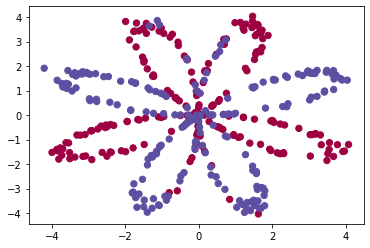

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 3.1 Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section 2.1 here, train it and then display the results. 

epoch[0] = 0.09728146
epoch[10] = 0.09935662
epoch[20] = 0.09936244
epoch[30] = 0.09934754
epoch[40] = 0.09926602
epoch[50] = 0.09892327
epoch[60] = 0.09817315
epoch[70] = 0.09724175
epoch[80] = 0.09589014
epoch[90] = 0.09443383
epoch[100] = 0.09332809
epoch[110] = 0.09259587
epoch[120] = 0.09211205
epoch[130] = 0.09177365
epoch[140] = 0.09152052
epoch[150] = 0.09132029
epoch[160] = 0.09115538
epoch[170] = 0.09101571
epoch[180] = 0.09089506
epoch[190] = 0.09078929
epoch[200] = 0.09069550
epoch[210] = 0.09061153
epoch[220] = 0.09053575
epoch[230] = 0.09046687
epoch[240] = 0.09040387
epoch[250] = 0.09034592
epoch[260] = 0.09029236
epoch[270] = 0.09024262
epoch[280] = 0.09019624
epoch[290] = 0.09015284


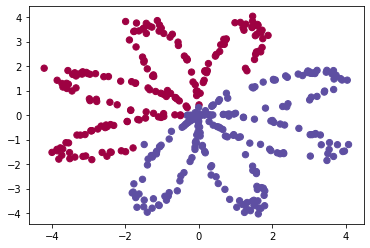

In [15]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 

nn = {
    'linear_1': nn_Linear(2, hidden_state_size),
    'linear_2': nn_Linear(hidden_state_size, 1),
    'sigmoid': nn_Sigmoid(),
    'loss': nn_MSECriterion(),
}

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        x_i = X[:, i]
        y_i = Y[:, i]
        
        # Forward pass (fill in your code)
        a0 = nn['linear_1'].forward(x_i.reshape(1, 2))
        a1 = nn['sigmoid'].forward(a0)
        a2 = nn['linear_2'].forward(a1)
        a3 = nn['sigmoid'].forward(a2)
        loss += nn['loss'].forward(a3, y_i)
        
        # Backward pass (fill in your code)
        da3 = nn['loss'].backward(a3, y_i)
        da2 = nn['sigmoid'].backward(a2, da3)
        da1 = nn['linear_2'].backward(a1, da2)
        da0 = nn['sigmoid'].backward(a0, da1)
        nn['linear_1'].backward(x_i.reshape(1, 2), da0)
        
        # Update gradients (fill in your code)
        nn['linear_1'].weight = nn['linear_1'].weight - learningRate * nn['linear_1'].gradWeight
        nn['linear_1'].bias = nn['linear_1'].bias - learningRate * nn['linear_1'].gradBias
        nn['linear_2'].weight = nn['linear_2'].weight - learningRate * nn['linear_2'].gradWeight
        nn['linear_2'].bias = nn['linear_2'].bias - learningRate * nn['linear_2'].gradBias
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    x_i = X[:, i]
    
    # Forward pass
    a0 = nn['linear_1'].forward(x_i.reshape(1, 2))
    a1 = nn['sigmoid'].forward(a0)
    a2 = nn['linear_2'].forward(a1)
    y_hat = nn['sigmoid'].forward(a2)
    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 3.2 Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09241678
epoch[10] = 0.09781934
epoch[20] = 0.09767770
epoch[30] = 0.09701358
epoch[40] = 0.09573943
epoch[50] = 0.09489850
epoch[60] = 0.09418834
epoch[70] = 0.09302600
epoch[80] = 0.09118375
epoch[90] = 0.08916377
epoch[100] = 0.08757663
epoch[110] = 0.08648782
epoch[120] = 0.08575350
epoch[130] = 0.08519125
epoch[140] = 0.08453253
epoch[150] = 0.08319880
epoch[160] = 0.08016500
epoch[170] = 0.07492183
epoch[180] = 0.06883248
epoch[190] = 0.06351317
epoch[200] = 0.05939159
epoch[210] = 0.05629560
epoch[220] = 0.05395882
epoch[230] = 0.05216327
epoch[240] = 0.05075314
epoch[250] = 0.04962105
epoch[260] = 0.04869321
epoch[270] = 0.04791847
epoch[280] = 0.04726082
epoch[290] = 0.04669443


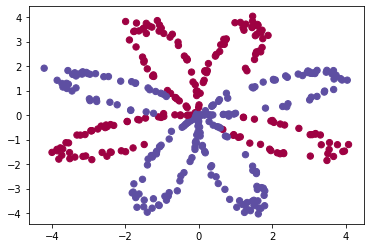

In [16]:
hidden_state_size = 5; 

# Rest should be taken from above
nn = {
    'linear_1': nn_Linear(2, hidden_state_size),
    'linear_2': nn_Linear(hidden_state_size, 1),
    'sigmoid': nn_Sigmoid(),
    'loss': nn_MSECriterion(),
}

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        x_i = X[:, i]
        y_i = Y[:, i]
        # Forward pass (fill in your code)
        a0 = nn['linear_1'].forward(x_i.reshape(1, 2))
        a1 = nn['sigmoid'].forward(a0)
        a2 = nn['linear_2'].forward(a1)
        a3 = nn['sigmoid'].forward(a2)
        loss += nn['loss'].forward(a3, y_i)
       
        # Backward pass (fill in your code)
        da3 = nn['loss'].backward(a3, y_i)
        da2 = nn['sigmoid'].backward(a2, da3)
        da1 = nn['linear_2'].backward(a1, da2)
        da0 = nn['sigmoid'].backward(a0, da1)
        nn['linear_1'].backward(x_i.reshape(1, 2), da0)
        
        # Update gradients (fill in your code)
        nn['linear_1'].weight = nn['linear_1'].weight - learningRate * nn['linear_1'].gradWeight
        nn['linear_1'].bias = nn['linear_1'].bias - learningRate * nn['linear_1'].gradBias
        nn['linear_2'].weight = nn['linear_2'].weight - learningRate * nn['linear_2'].gradWeight
        nn['linear_2'].bias = nn['linear_2'].bias - learningRate * nn['linear_2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    x_i = X[:, i]
    
    # Forward pass
    a0 = nn['linear_1'].forward(x_i.reshape(1, 2))
    a1 = nn['sigmoid'].forward(a0)
    a2 = nn['linear_2'].forward(a1)
    y_hat = nn['sigmoid'].forward(a2)
    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

<div style="font-size:0.8em;color:#888;text-align:center;padding-top:20px;">If you find any errors or have questions about the assignment please contact instructor at lsigal@cs.ubc.ca or post the question on Piazza. 

# 4. PyTorch and Debugging [20 points].

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part you are given re-implementation of the dataset and neural network you worked with in Section 3 of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs. 

##4.1 Dataloader 

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below. 

In [21]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.Y[ix] = random.randint(0, 1) 

    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]
    
    def get_all_data(self):
      ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
      return self.X.T, self.Y.T


/Users/xuanchen/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 4.2 **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above. 

**Hint:** only one line needs changing in the dataloader. 

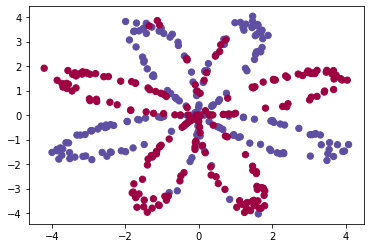

In [22]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 4.3 Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section 3, using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00446593
epoch[10] = 0.00421264
epoch[20] = 0.00408666
epoch[30] = 0.00412102
epoch[40] = 0.00409701
epoch[50] = 0.00404768
epoch[60] = 0.00407437
epoch[70] = 0.00394459
epoch[80] = 0.00397491
epoch[90] = 0.00401088
epoch[100] = 0.00397890
epoch[110] = 0.00395802
epoch[120] = 0.00390520
epoch[130] = 0.00398029
epoch[140] = 0.00395689
epoch[150] = 0.00395491
epoch[160] = 0.00386077
epoch[170] = 0.00394994
epoch[180] = 0.00384857
epoch[190] = 0.00383221
epoch[200] = 0.00387401
epoch[210] = 0.00382981
epoch[220] = 0.00390974
epoch[230] = 0.00377080
epoch[240] = 0.00382554
epoch[250] = 0.00373893
epoch[260] = 0.00376589
epoch[270] = 0.00380972
epoch[280] = 0.00387302
epoch[290] = 0.00379644


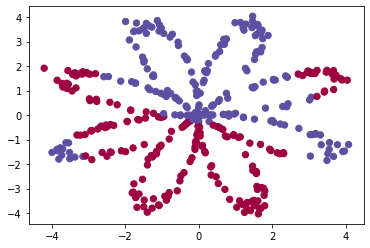

In [32]:
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 4.4 **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader. 

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00328299
epoch[10] = 0.00000535
epoch[20] = 0.00000450
epoch[30] = 0.00000390
epoch[40] = 0.00000345
epoch[50] = 0.00000308
epoch[60] = 0.00000279
epoch[70] = 0.00000255
epoch[80] = 0.00000235
epoch[90] = 0.00000217
epoch[100] = 0.00000202
epoch[110] = 0.00000189
epoch[120] = 0.00000178
epoch[130] = 0.00000168
epoch[140] = 0.00000159
epoch[150] = 0.00000151
epoch[160] = 0.00000143
epoch[170] = 0.00000137
epoch[180] = 0.00000131
epoch[190] = 0.00000125
epoch[200] = 0.00000120
epoch[210] = 0.00000115
epoch[220] = 0.00000111
epoch[230] = 0.00000107
epoch[240] = 0.00000103
epoch[250] = 0.00000100
epoch[260] = 0.00000096
epoch[270] = 0.00000093
epoch[280] = 0.00000090
epoch[290] = 0.00000088


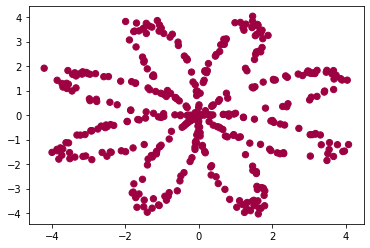

In [36]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)
    

# Copy the code from Section 4.3 and modify accordingly
hidden_state_size = 5; 
fix_seeds()

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 4.5 **Debugging Strategy 3:** Train with minimal amount of data 

It may still be difficult to identify what is wrong based on results in Section 4.4. A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section 4.4 in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be. 

epoch[0] = 0.00075495
epoch[10] = 0.00002856
epoch[20] = 0.00000152
epoch[30] = 0.00000049
epoch[40] = 0.00000033
epoch[50] = 0.00000028
epoch[60] = 0.00000026
epoch[70] = 0.00000026
epoch[80] = 0.00000025
epoch[90] = 0.00000025
epoch[100] = 0.00000025
epoch[110] = 0.00000024
epoch[120] = 0.00000024
epoch[130] = 0.00000024
epoch[140] = 0.00000023
epoch[150] = 0.00000023
epoch[160] = 0.00000023
epoch[170] = 0.00000023
epoch[180] = 0.00000022
epoch[190] = 0.00000022
epoch[200] = 0.00000022
epoch[210] = 0.00000022
epoch[220] = 0.00000022
epoch[230] = 0.00000021
epoch[240] = 0.00000021
epoch[250] = 0.00000021
epoch[260] = 0.00000021
epoch[270] = 0.00000021
epoch[280] = 0.00000020
epoch[290] = 0.00000020


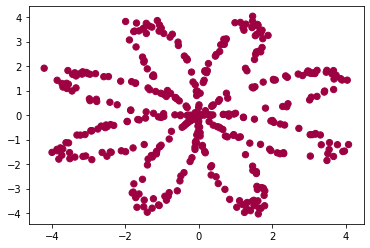

In [37]:
# Copy the code from Section 4.4 and modify to run with batch size of 1 and only one / same batch used in each epoch.
# Copy the code from Section 4.4 and modify to run with batch size of 1 and only one / same batch used in each epoch.
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)
    

hidden_state_size = 5; 
fix_seeds()
# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 1

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        break

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

epoch[0] = 0.00366178
epoch[10] = 0.00000379
epoch[20] = 0.00000322
epoch[30] = 0.00000285
epoch[40] = 0.00000251
epoch[50] = 0.00000229
epoch[60] = 0.00000212
epoch[70] = 0.00000191
epoch[80] = 0.00000176
epoch[90] = 0.00000170
epoch[100] = 0.00000156
epoch[110] = 0.00000148
epoch[120] = 0.00000143
epoch[130] = 0.00000134
epoch[140] = 0.00000123
epoch[150] = 0.00000120
epoch[160] = 0.00000111
epoch[170] = 0.00000108
epoch[180] = 0.00000103
epoch[190] = 0.00000099
epoch[200] = 0.00000097
epoch[210] = 0.00000093
epoch[220] = 0.00000088
epoch[230] = 0.00000085
epoch[240] = 0.00000083
epoch[250] = 0.00000079
epoch[260] = 0.00000077
epoch[270] = 0.00000075
epoch[280] = 0.00000074
epoch[290] = 0.00000069


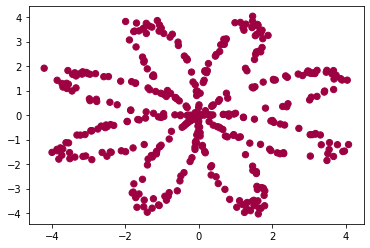

In [39]:
# Once you find the bug, fix it here and make sure you can effectively reproduce the result in Section 3
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)
    

# Copy the code from Section 4.3 and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 4.6 **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [48]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




epoch[0] = 0.00443338
epoch[10] = 0.00417667
epoch[20] = 0.00405944
epoch[30] = 0.00393797
epoch[40] = 0.00392385
epoch[50] = 0.00383938
epoch[60] = 0.00375627
epoch[70] = 0.00353913
epoch[80] = 0.00308531
epoch[90] = 0.00266081
epoch[100] = 0.00232882
epoch[110] = 0.00223221
epoch[120] = 0.00217222
epoch[130] = 0.00217466
epoch[140] = 0.00210924
epoch[150] = 0.00222707
epoch[160] = 0.00187965
epoch[170] = 0.00206101
epoch[180] = 0.00187530
epoch[190] = 0.00186551
epoch[200] = 0.00187034
epoch[210] = 0.00191392
epoch[220] = 0.00199345
epoch[230] = 0.00187016
epoch[240] = 0.00170770
epoch[250] = 0.00166671
epoch[260] = 0.00185359
epoch[270] = 0.00180064
epoch[280] = 0.00187143
epoch[290] = 0.00184877


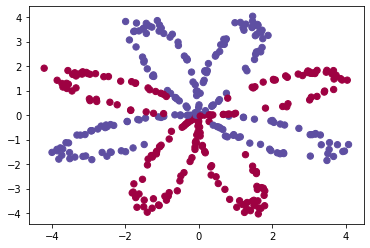

In [50]:
# Insert your code here
hidden_state_size = 5; 
writer = SummaryWriter()

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += (output > 0.5).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()

        
%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

Now install the tensorboard

In [51]:
!pip install tensorboard

Now to start tensorboard in google colab we can run following command.

In [52]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19489), started 0:02:03 ago. (Use '!kill 19489' to kill it.)